# GROUP PROJECT
# MEMBERS
# SHIVANG KHANA
# SHASHWAT SHARMA
# ARYAN SHARMA

# Credit Card Fraud Detection

# content
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
data=pd.read_csv("D:\machine learing\credit card fraud\creditcard.csv")
data

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Shiva\AppData\Local\Temp\ipykernel_956\3394881946.py:11: SyntaxWarning: invalid escape sequence '\m'
  data=pd.read_csv("D:\machine learing\credit card fraud\creditcard.csv")


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Explotary data analysis

In [6]:
data.shape

(284807, 31)

Checking null values

In [6]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# class distribution

# Target Variable = Class column

C:\Users\Shiva\AppData\Local\Temp\ipykernel_956\3377184413.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='pastel')


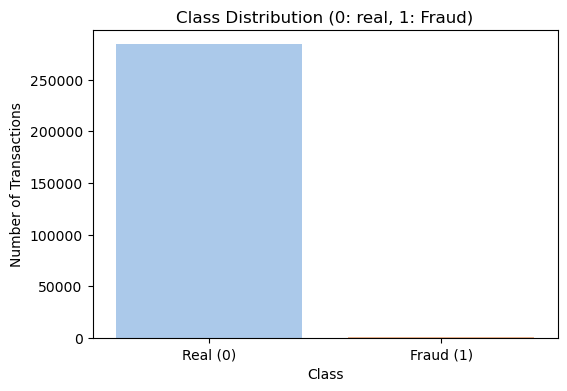

In [9]:
class_counts = data['Class'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='pastel')
plt.title("Class Distribution (0: real, 1: Fraud)")
plt.xlabel("Class")
plt.ylabel("Number of Transactions")
plt.xticks([0, 1], ['Real (0)', 'Fraud (1)'])
plt.show()


# correlation map

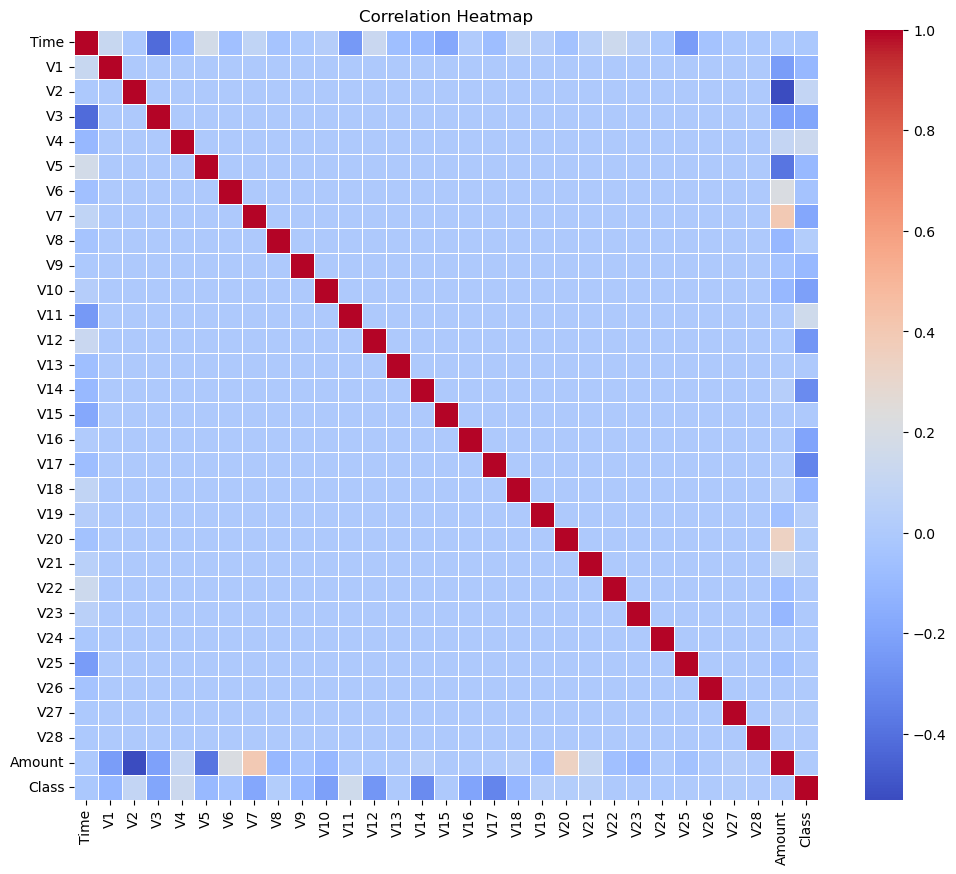

In [11]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


# FEATURE SCALING

Feature scaling is a technique used to normalize or standardize the range of independent variables (features) in a dataset. The goal is to ensure that no single feature dominates others during model training due to differences in their scale or units.

In [13]:
scaler_amount = StandardScaler()
scaler_time = StandardScaler()
data['scaled_amount'] = scaler_amount.fit_transform(data[['Amount']])
data['scaled_time'] = scaler_time.fit_transform(data[['Time']])
data.drop(['Time', 'Amount'], axis=1, inplace=True)
scaled_cols = ['scaled_time', 'scaled_amount']
other_cols = [col for col in data.columns if col not in scaled_cols]
data = data[scaled_cols + other_cols]
print(data.head())


   scaled_time  scaled_amount        V1        V2        V3        V4  \
0    -1.996583       0.244964 -1.359807 -0.072781  2.536347  1.378155   
1    -1.996583      -0.342475  1.191857  0.266151  0.166480  0.448154   
2    -1.996562       1.160686 -1.358354 -1.340163  1.773209  0.379780   
3    -1.996562       0.140534 -0.966272 -0.185226  1.792993 -0.863291   
4    -1.996541      -0.073403 -1.158233  0.877737  1.548718  0.403034   

         V5        V6        V7        V8  ...       V20       V21       V22  \
0 -0.338321  0.462388  0.239599  0.098698  ...  0.251412 -0.018307  0.277838   
1  0.060018 -0.082361 -0.078803  0.085102  ... -0.069083 -0.225775 -0.638672   
2 -0.503198  1.800499  0.791461  0.247676  ...  0.524980  0.247998  0.771679   
3 -0.010309  1.247203  0.237609  0.377436  ... -0.208038 -0.108300  0.005274   
4 -0.407193  0.095921  0.592941 -0.270533  ...  0.408542 -0.009431  0.798278   

        V23       V24       V25       V26       V27       V28  Class  
0 -0.1104

In [14]:
data.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.996583,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-1.996583,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.996562,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-1.996562,0.140534,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.996541,-0.073403,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


# Training and Testing Split

The train-test split is a technique used in machine learning to divide a dataset into two subsets: training data and testing data. Here's a detailed breakdown:

Why Split the Data?
Training Data: Used to train the model. The model learns patterns and relationships in the data from this subset.

Testing Data: Used to test the model. The test set simulates new, unseen data that the model will encounter in the real world. It helps evaluate the model's performance and how well it generalizes to new data.



# Handling Class Imbalance (with SMOTE)

Credit card fraud datasets are often highly imbalanced — meaning fraudulent transactions (the minority class) are much fewer than legitimate ones (the majority class). If the model sees mostly legitimate transactions, it might predict everything as "legitimate" (because it’s the majority class) and completely miss the fraud cases.

To address this imbalance:

SMOTE (Synthetic Minority Over-sampling Technique) generates synthetic fraud cases to increase the number of fraud instances in the training data. This forces the model to pay more attention to fraud cases and improves its ability to detect them.

Without SMOTE or some form of balancing, the model might have poor recall (i.e., it misses fraud cases), which is critical in fraud detection.

In [15]:
X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Before SMOTE:", y_train.value_counts())

smote = SMOTE(random_state=42) 
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
 
print("After SMOTE:", y_train_smote.value_counts())


Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


# Model Selection

# 1.Logestic Regression

Logistic Regression is a simple yet powerful classification algorithm used to predict binary outcomes, such as whether a credit card transaction is fraudulent or not. It calculates the probability of a transaction belonging to the fraud class using a sigmoid function, which outputs values between 0 and 1. If the probability exceeds a threshold (typically 0.5), the model predicts it as fraud; otherwise, it predicts it as legitimate. It's fast, interpretable, and serves well as a baseline model, especially for imbalanced datasets like fraud detection. While it assumes a linear relationship between features and the log-odds of the target, it performs reasonably well when combined with techniques like SMOTE or by adjusting class weights to handle imbalance.

In [17]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_smote, y_train_smote)

y_pred = lr_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


Confusion Matrix:
[[55406  1458]
 [    8    90]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

ROC AUC Score: 0.9463636115673055


# 2.Random Forest

Random Forest is a powerful ensemble machine learning algorithm that builds multiple decision trees and combines their outputs to make more accurate and stable predictions. Each tree is trained on a random subset of the data and features, which helps reduce overfitting and improves generalization. For credit card fraud detection, Random Forest works well because it's robust to noise, handles imbalanced datasets effectively, and can capture complex, non-linear relationships between features. It also provides feature importance scores, helping us understand which variables contribute most to detecting fraud. While it may be slower than simpler models, its high accuracy and resistance to overfitting make it a strong choice for fraud detection tasks.


✅ Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.83      0.84        98

    accuracy                           1.00     56962
   macro avg       0.93      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962


✅ Confusion Matrix:
[[56850    14]
 [   17    81]]


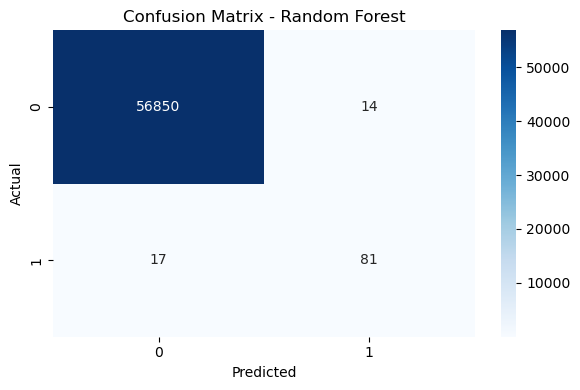


✅ ROC AUC Score: 0.9131422053908789


In [30]:
X = data.drop(columns=['Class'])
y = data['Class']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

print("\n✅ Classification Report:")
report = classification_report(y_test, y_pred)
print(report)

print("\n✅ Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()

roc_score = roc_auc_score(y_test, y_pred)
print("\n✅ ROC AUC Score:", roc_score)


# Conclusion 
we can conclude that both the models have high accuracy i.e 97% and 100% but in logistic regression this high accuracy is misleading due to the class imbalance. The model is performing well on the majority class (non-fraud), but it’s not as effective in predicting the minority class (fraud).
whereas in random forest the model performs perfectly for non-fraudulent transactions with 1.00 precision, 1.00 recall, and 1.00 F1-score and in fraud transactions the model performs reasonably well, with 0.92 precision, 0.83 recall, and 0.87 F1-score. This indicates that it does a good job identifying fraud, though it still misses some fraudulent cases (lower recall). so we are gonna prefer random forest here.

# THANK YOU